## Importing required libraries

In [8]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , AveragePooling2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras import backend

In [9]:
train_path = "train/"
val_path = "val/"
test_path = "test/"

image_w = 128
image_h = 128
stride = (3,3)
pool = (2,2)
batch_size = 100
if backend.image_data_format() == "channels_first":
    input_shape = (3 , image_w , image_h)
else:
    input_shape = (image_w , image_h , 3)

## Training image augmentation and generation

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    shear_range=0.2
)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
train_generator.class_indices

Found 1600 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

In [13]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
val_generator.class_indices

Found 16 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

## Testing image generation

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
test_generator.class_indices

Found 350 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

## Creating the deep learning model

In [15]:
model = Sequential()

model.add( Conv2D(32 , stride , padding="same" , activation="relu" , input_shape=input_shape) )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(64 , stride , padding="same" , activation="relu") )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(128 , stride , padding="same" , activation="relu") )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(128 , stride , padding="same" , activation="relu") )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Flatten() )

model.add( Dropout(.5) )

model.add( Dense(512 , activation="relu") )

model.add( Dense(1 , activation="sigmoid") )

model.compile(optimizer="rmsprop" , loss="binary_crossentropy" , metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)      

## Fitting training data (batch size = 100)

In [16]:
history = model.fit_generator(
    train_generator,
    epochs=50,
    validation_data=test_generator,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
16/16 [==============================] - 50s 3s/step - loss: 1.0771 - accuracy: 0.5825 - val_loss: 0.8142 - val_accuracy: 0.7143
Epoch 2/50
16/16 [==============================] - 49s 3s/step - loss: 0.6629 - accuracy: 0.6637 - val_loss: 0.6191 - val_accuracy: 0.7143
Epoch 3/50
16/16 [==============================] - 48s 3s/step - loss: 0.6226 - accuracy: 0.7113 - val_loss: 0.7202 - val_accuracy: 0.4886
Epoch 4/50
16/16 [==============================] - 49s 3s/step - loss: 0.5821 - accuracy: 0.7125 - val_loss: 0.6075 - val_accuracy: 0.7086
Epoch 5/50
16/16 [==============================] - 48s 3s/step - loss: 0.5178 - accuracy: 0.7738 - val_loss: 0.6179 - val_accuracy: 0.6886
Epoch 6/50
16/16 [==============================] - 61s 4s/step - loss: 0.5347 - accuracy: 0.7638 - val_loss: 0.6143 - val_accuracy: 0.7143
Epoch 7/50
16/16 [==============================] - 47s 3s/step - loss: 0.4570 - acc

In [17]:
loss, acc = model.evaluate_generator(test_generator , verbose=1)
# model.save("unsharp_10epochs.h5")
loss , acc

Instructions for updating:
Please use Model.evaluate, which supports generators.
4/4 [==============================] - 3s 660ms/step - loss: 0.6312 - accuracy: 0.7057


(0.6312349438667297, 0.7057142853736877)

## Plotting accuracy and loss

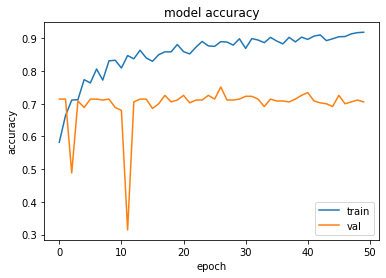

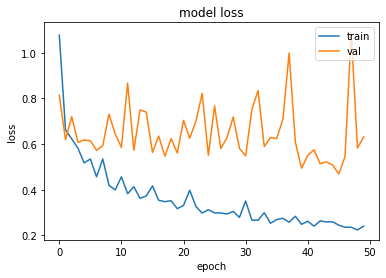

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig("15pochs_acc.jpg")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig("15pochs_loss.jpg")
plt.show()